# Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean,median
%matplotlib inline

In [5]:
data = pd.read_csv("playstore-analysis (2) (1).csv")

# Description of data


In [6]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [8]:
data.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [9]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Data Cleanup

### 1. a)Drop records where rating is missing since rating is our target/study variable


In [10]:

data = data[data["Rating"].notna()]

In [11]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

### b. Check the null values for the Android Ver column.

In [12]:
data[data["Android Ver"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### i) no the first two records have missing version but the thirs record has micplaced values

### ii. Drop the 3rd record i.e. record for “Life Made WIFI ...”

In [13]:
data.drop(10472,inplace=True)

In [14]:
data[data["Android Ver"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


### iii. Replace remaining missing values with the mode

In [15]:
data["Android Ver"].fillna(data["Android Ver"].mode,inplace=True)

In [16]:
data[data["Android Ver"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [17]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

### c. Current ver – replace with most common value

In [18]:
data["Current Ver"].fillna(data["Current Ver"].mode,inplace=True)

In [19]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [20]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### 2. Data clean up – correcting the data types


### a. Which all variables need to be brought to numeric types?
   

####   Reviews
   

#### Installs
  

#### Price

In [21]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### b. Price variable – remove $ sign and convert to float

In [22]:
data['Price'] = data['Price'].str.replace("$","")

<ipython-input-22-1d3427c7c0cd>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace("$","")


In [23]:
data = data.astype({'Price':float})

### c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [24]:
data['Installs'] = data['Installs'].str.replace(',',"").str.replace('+',"").str.replace('-',"")

<ipython-input-24-a2100d9c2b72>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['Installs'] = data['Installs'].str.replace(',',"").str.replace('+',"").str.replace('-',"")


In [25]:
data = data.astype({'Installs':int})

In [26]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### d. Convert all other identified columns to numeric

In [27]:
data = data.astype({'Reviews':int})
data["Last Updated"] = pd.to_datetime(data["Last Updated"])

In [28]:
data.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

### 3. Sanity checks – check for the following and handle accordingly  



### a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store. 

### i. Are there any such records? Drop if so. 

In [29]:
data['Rating'].max()

5.0

In [30]:
data['Rating'].min()

1.0

### The max value of rating is 5 and minimum is 1 so there are no records which falls out of the range

### b. Reviews should not be more than installs as only those who installed can review the app.


### i. Are there any such records? Drop if so.

In [31]:
ex = data[data["Reviews"] > data["Installs"]]

In [32]:
ex

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,2018-08-02,1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,2018-07-30,Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,2017-02-08,1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,2018-07-23,1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,2017-03-11,0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,2018-07-23,1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,2017-03-03,1.0,2.3 and up


In [33]:
ex.index

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [34]:
data = data.drop(ex.index)

In [35]:
data[data["Reviews"] > data["Installs"]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### 4. Identify and handle outliers –



### a. Price columnm

### i. Make suitable plot to identify outliers in price

In [36]:
paid_apps = data[data['Price'] > 0]

In [37]:
sns.set(rc={'figure.figsize':(8,8)})

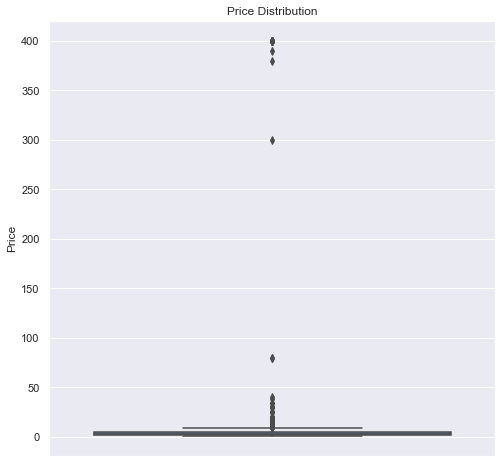

In [38]:
g = sns.boxplot(y = paid_apps["Price"])
plt.title("Price Distribution")
plt.show()

### ii. Do you expect apps on the playstore to cost 200?Checkoutthesecases

In [39]:
outlie = paid_apps[paid_apps["Price"] > 200]

In [40]:
paid_apps = paid_apps.drop(outlie.index)
data = data.drop(outlie.index)

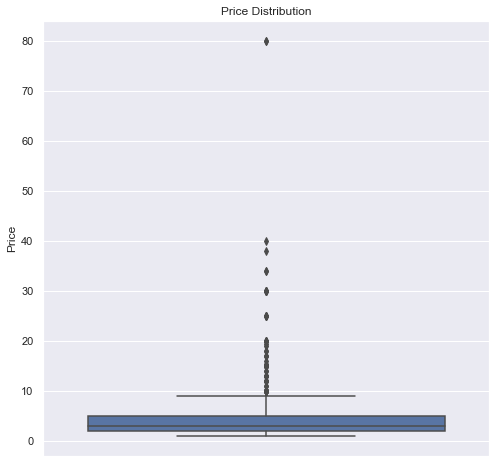

In [41]:
g = sns.boxplot(y = paid_apps['Price'])
plt.title("Price Distribution")
plt.show()

### iii. After dropping the useless records, make the suitable plot again to identify outliers


### iv. Limit data to records with price < $30

In [42]:
outlie = paid_apps[paid_apps["Price"] > 30]

In [43]:
outlie

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,2018-06-18,19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,2017-10-02,2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,2018-06-18,19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,2017-10-02,2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,2018-04-04,3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,2017-07-18,1.0,4.0.3 and up


In [44]:
paid_apps = paid_apps.drop(outlie.index)
data = data.drop(outlie.index)

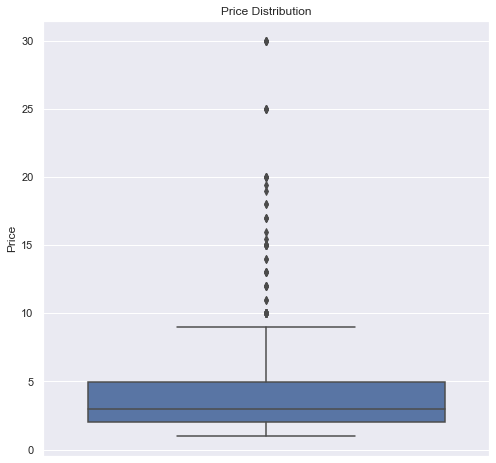

In [45]:
g = sns.boxplot(y = paid_apps['Price'])
plt.title("Price Distribution")
plt.show()

In [46]:
data['Price'].max()

29.99

In [47]:
data['Price'].min()

0.0

### b. Reviews column



### i. Make suitable plot


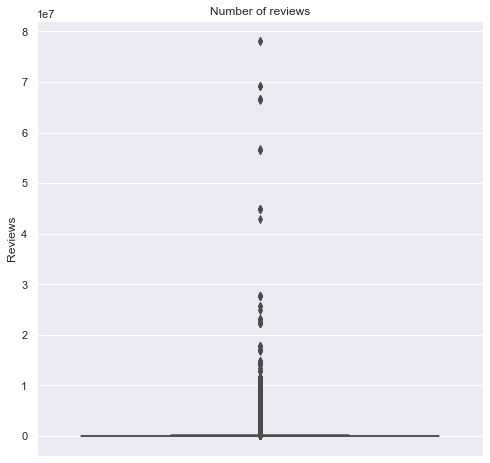

In [48]:
g = sns.boxplot(y = data["Reviews"])
plt.title("Number of reviews")
plt.show()

In [49]:
data["Reviews"].max()

78158306

In [50]:
data["Reviews"].min()

1

### ii. Limitdatatoappswith<1Millionreviews

In [51]:
outlie = data[data['Reviews'] > 1000000]

In [52]:
outlie

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516.529524,100000000,Free,0.0,Teen,Books & Reference,2018-08-01,Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516.529524,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,21516.529524,10000000,Free,0.0,Everyone,Business,2018-08-03,Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.000000,100000000,Free,0.0,Everyone,Business,2018-08-02,9.7.14188,4.1 and up
201,Facebook Pages Manager,BUSINESS,4.0,1279184,21516.529524,50000000,Free,0.0,Everyone,Business,2018-08-02,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.000000,10000000,Free,0.0,Teen,Simulation,2018-06-11,1.13.12,4.1 and up
10200,Facebook Pages Manager,BUSINESS,4.0,1279800,21516.529524,50000000,Free,0.0,Everyone,Business,2018-08-06,Varies with device,Varies with device
10327,Garena Free Fire,GAME,4.5,5534114,53000.000000,100000000,Free,0.0,Teen,Action,2018-08-03,1.21.0,4.0.3 and up
10636,FRONTLINE COMMANDO,GAME,4.4,1351833,12000.000000,10000000,Free,0.0,Teen,Action,2013-10-28,3.0.3,2.1 and up


In [53]:
data = data.drop(outlie.index)

In [54]:
data["Reviews"].max()

995002

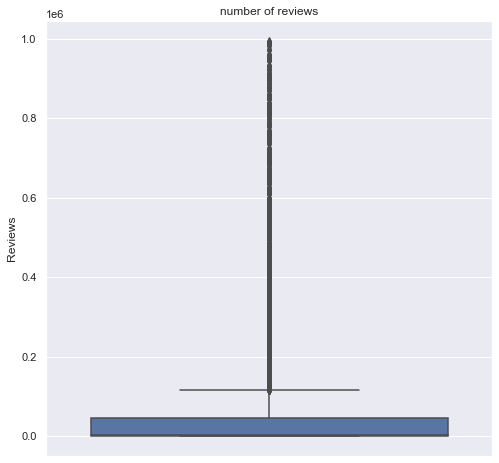

In [55]:
g = sns.boxplot(y = data["Reviews"])
plt.title("number of reviews")
plt.show()

### c. Installs



### i. What is the 95th percentile of the installs?


In [56]:
limit = np.percentile(data['Installs'],95)

### ii. Drop records having a value more than the 95th percentile

In [57]:
outlie = data[data['Installs'] > limit]

In [58]:
data = data.drop(outlie.index)

In [59]:
data['Installs'].max()

10000000

# Data analysis to answer business questions

### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

/Users/himanshusaroha/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


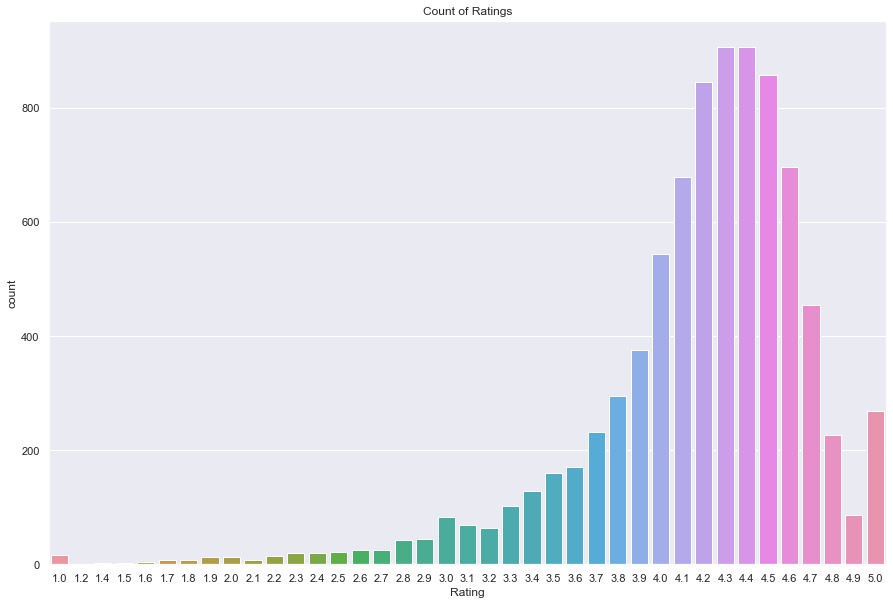

In [93]:
g = sns.countplot(data["Rating"])
sns.set(rc={'figure.figsize':(20,20)})
plt.title("Count of Ratings")
plt.show()

### a. How do you explain this?


### b. What is the implication of this on your analysis?

#### most apps are rated between 4 and 5

#### There are very few apps which are rated less than 3

#### Maximum numer of the apps are rated 4.3 and 4.4

### 6. What are the top Content Rating values?


/Users/himanshusaroha/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


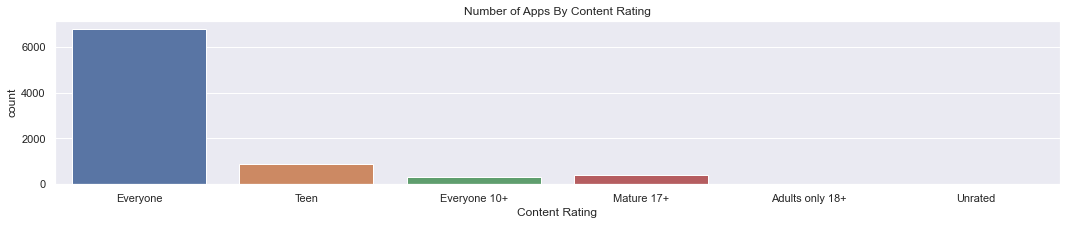

In [61]:
g = sns.countplot(data["Content Rating"])
plt.title("Number of Apps By Content Rating")
sns.set(rc={'figure.figsize':(15,10)})
plt.show()

### a. Are there any values with very few records?

#### Yes "Adults only 18+ " and "Underrated"

### b. If yes, drop those as they won’t help in the analysis

In [62]:
no_records = data[data['Content Rating'] == "Adults only 18+"]

In [63]:
no_records

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900.000000,500000,Free,0.0,Adults only 18+,Comics,2018-07-04,1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000.000000,1000000,Free,0.0,Adults only 18+,Sports,2018-07-24,3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,21516.529524,500000,Free,0.0,Adults only 18+,Comics,2018-08-03,Varies with device,Varies with device


In [64]:
data = data.drop(no_records.index)

In [65]:
no_records = data[data['Content Rating'] == "Unrated"]

In [66]:
no_records

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8266,DC Universe Online Map,TOOLS,4.1,1186,6400.0,50000,Free,0.0,Unrated,Tools,2012-02-27,1.3,2.3.3 and up


In [67]:
data = data.drop(no_records.index)

/Users/himanshusaroha/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


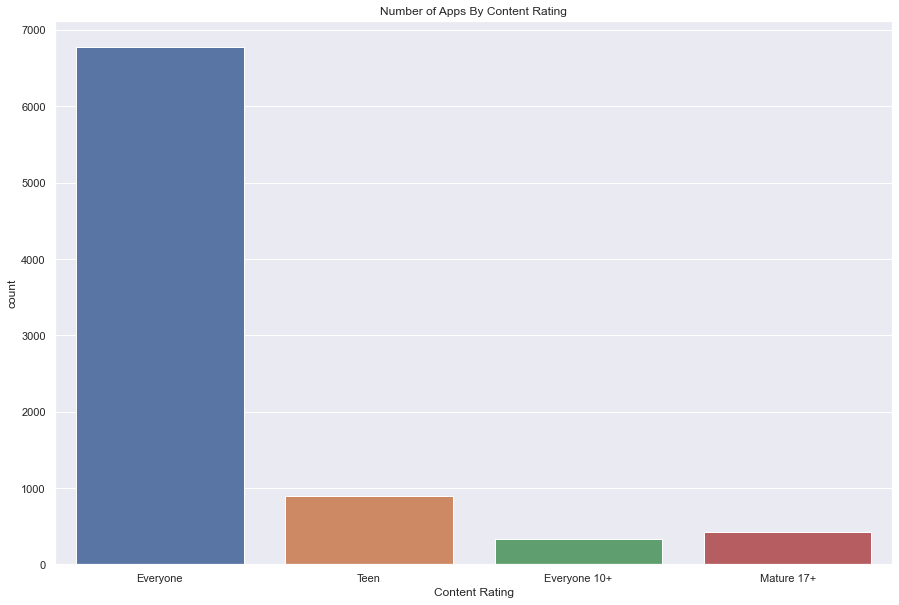

In [68]:
g = sns.countplot(data["Content Rating"])
plt.title("Number of Apps By Content Rating")
sns.set(rc={'figure.figsize':(15,10)})
plt.show()

### 7. Effect of size on rating

### a. Make a joinplot to understand the effect of size on rating


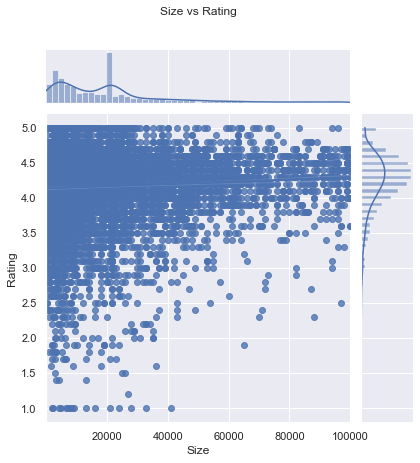

In [69]:
g = sns.jointplot(x=data["Size"],y= data["Rating"],kind="reg")
plt.title("Size vs Rating",y=1.3)
plt.show()

### b. Do you see any patterns?


The apps of the lower size are rated distributively. They also contribute to the lowest rated apps while the apps of greater size are rated better as comared to the apps of small sizes.The frequency of the small apps is also way too high than the apps with large sizes. The maximum number os apps is around 20000 in size

### c. How do you explain the pattern?

##### The regresion lines shows an upward trend as the size of the app increases which shows that the apps with greater size provides a better experience to the user

### 8. Effect of price on rating

### a. Make a jointplot (with regression line)

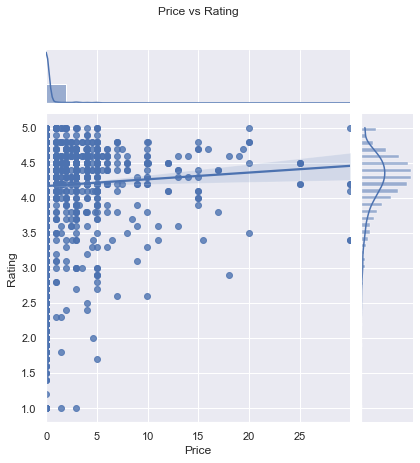

In [70]:
sns.set(rc={'figure.figsize':(15,10)})
g = sns.jointplot(x=data["Price"],y= data["Rating"],kind="reg")
plt.title("Price vs Rating",y=1.3)

plt.show()

### b. What pattern do you see?

### c. How do you explain the pattern?

The regression line shows an upward trend as the price goes up but there are very few apps with higher price but they are rated very good

### d. Replot the data, this time with only records with price > 0


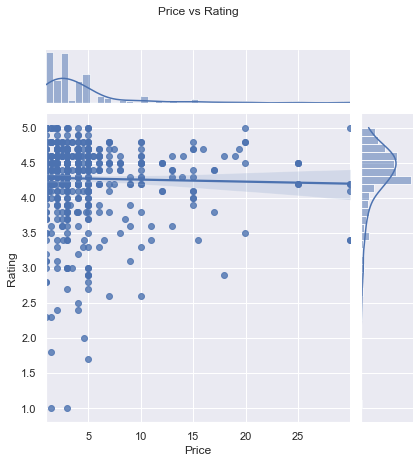

In [71]:
g = sns.jointplot(x=paid_apps["Price"],y= paid_apps["Rating"],kind="reg")
plt.title("Price vs Rating",y=1.3)
plt.show()

### e. Does the pattern change?

### f. What is your overall inference on the effect of price on the rating

Yes, now the regression line shows a slight downward trend when the price of the app increases but this is not beacause the high priced apps are poorly rated rather it is beacuse there are a very few high priced apps so we see a slight downward trend in the regression line

### 9. Look at all the numeric interactions together –


### a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

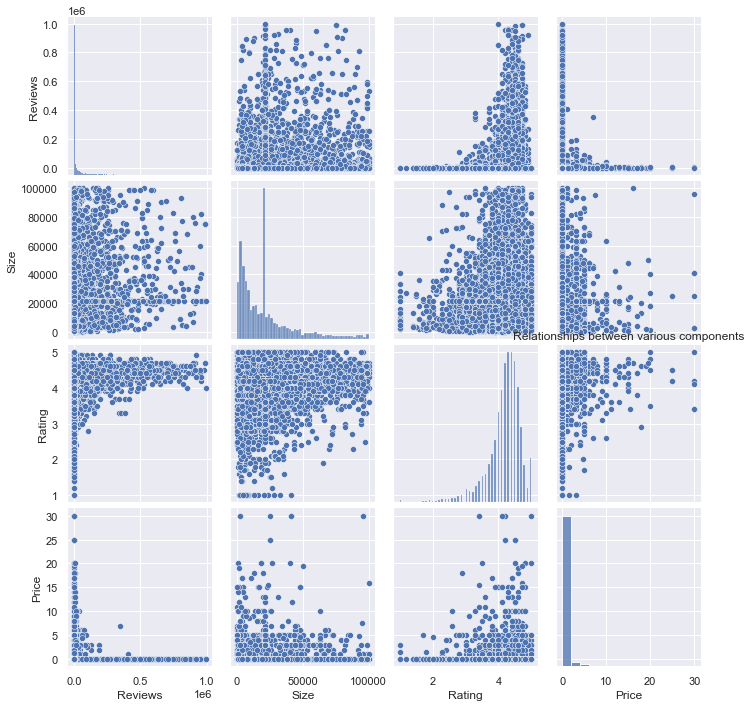

In [72]:
g = sns.pairplot(data=data[["Reviews","Size","Rating","Price"]])
plt.title("Relationships between various components")
plt.show()

### 10. Rating vs. content rating

### a. Make a bar plot displaying the rating for each content rating

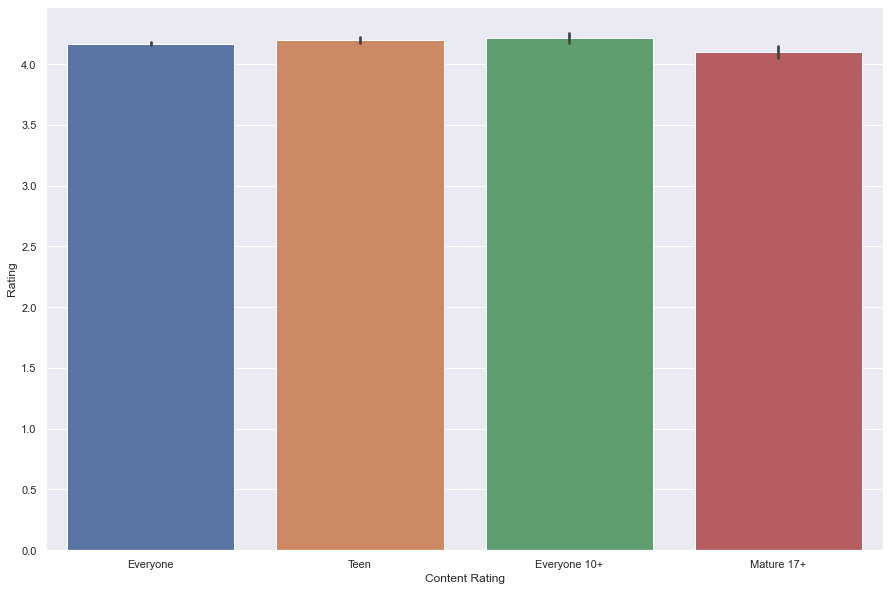

In [73]:
sns.barplot(x="Content Rating",y="Rating",data=data,estimator=mean)
sns.set(rc={'figure.figsize':(6,6)})

### b. Which metric would you use? Mean? Median? Some other quantile?


I used the metric mean as the rating are only between the range of 1 and 5 

### 11. Content rating vs. size vs. rating – 3 variables at a time

### a. Create 5 buckets (20% records in each) based on Size

In [74]:
data["Size"].max()

100000.0

In [75]:
data["Size"].min()

8.5

In [76]:
np.percentile(data["Size"],20)

4600.0

In [77]:
np.percentile(data["Size"],40)

12000.0

In [78]:
np.percentile(data["Size"],60)

21516.529524330235

In [79]:
np.percentile(data["Size"],80)

32000.0

In [80]:
interval = [0,4600,12000,21516,32000,100000]

In [81]:
data["Size_Bucket"] = pd.cut(data["Size"],interval,labels= ["very small","small","medium","large","very large"])

In [82]:
pd.pivot_table(data,values="Rating",index="Size_Bucket",columns="Content Rating").round(2)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Bucket,,,,
very small,4.12,4.19,3.95,4.22
small,4.16,4.21,4.13,4.21
medium,4.18,4.30,3.88,4.12
large,4.21,4.20,4.16,4.17
very large,4.19,4.22,4.19,4.24


### b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [83]:
table = pd.pivot_table(data,values="Rating",index="Size_Bucket",columns="Content Rating",aggfunc=lambda x:np.quantile(x,0.2)).round(2)

In [84]:
table

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Bucket,,,,
very small,3.8,3.84,3.28,3.84
small,3.8,3.94,3.64,3.80
medium,3.9,4.16,3.50,3.90
large,4.0,4.00,3.98,3.90
very large,3.9,4.00,4.00,4.00


### c. Make a heatmap of this

### i. Annotated

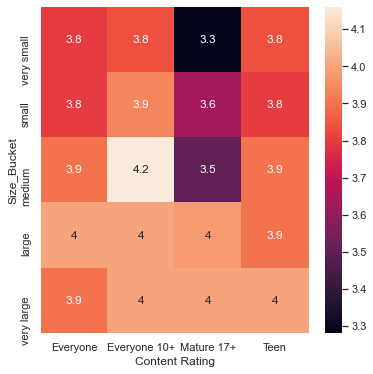

In [85]:
sns.heatmap(table, annot = True)
sns.set(rc={'figure.figsize':(6,6)})
plt.show()

### ii. Greenscolormap

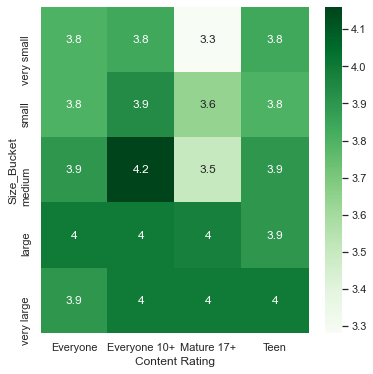

In [86]:
sns.heatmap(table, annot = True ,cmap='Greens')
sns.set(rc={'figure.figsize':(6,6)})
plt.show()

### d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

The apps with size large or very large are rated good. Although for other categories the rating is not bad for smaller sizes but espicially in the category Mature 17+ only the apps with size large or very large are prefered.